## Machine learning

tranfer learning : 지금 학습시킨걸 기반으로 조금만 더 학습 시키면 더 좋다  
Data로부터 Specific 문제 해결을 위한 최적의 모델 만들기 == 성능이 좋아야한다  
여기서 성능의 기준도 다양하다.  
unseen data에서도 좋은 모델을 만드는게 기계학습의 목적  
모델 overfitting 안되게 해야한다  
CS 에서 목적은 결과 예측 통계는 추론  
bias 와 variance tradeoff

책 : `마스터 알고리즘`  
책 : `인공지능1 : 현대적 접근방식 - 피터 노빅`   
`구글단기과정`

모델 내에서 hyperparameter 수정을 통해 적합

In [7]:
import numpy as np
import pandas as pd

C:\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
from sklearn.datasets import load_iris
## tab을 눌러보면 loda fetch make _ 등이 있음
## load _ 는 크기가 작은 데이터들
## fetch_ 는 뭐냐 인터넷에서 데이터를 가지고 오는 크기가 큰데이터
## make_ random하게 데이터를 생성 해주는 거

In [22]:
data = load_iris()

bunch

In [23]:
dir(data)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [24]:
data ##numpy 기반이다 그래서 GPU 지원이 안된다

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [26]:
iris = pd.DataFrame(data.data, columns=data.feature_names)

In [27]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [31]:
#iris.head()

# iris.info()

iris.describe()

# iris.columns

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [32]:
iris_target = pd.DataFrame(data.target)

In [39]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [43]:
iris_target = pd.DataFrame(data.target, columns=['target']) ##타겟 따로생성

In [46]:
iris = pd.concat([iris,iris_target], axis = 1)

In [47]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


이러면 이제부터 시작이야  
iris 는 classification 데이터

In [48]:
from sklearn.neighbors import KNeighborsClassifier

pascal 방식은 클래스 그래서 인스턴스화 필요

cs에서는 training  
통계에서는 fitting

In [63]:
knn2 = KNeighborsClassifier() ##default 가 5

### 컬럼추출하는 다섯가지 방법 다써보기

In [64]:
knn2.fit(iris[iris.columns[:-1]], iris[iris.columns[-1]])  ##fancy indexing as pandas

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
knn.fit(iris.iloc[:,:-1], )

In [ ]:
knn.fit(iris.loc)

In [ ]:
knn.fit

In [ ]:
knn.fit

####  데이터가 좋으면 알고리즘별로 큰 차이가 나지않는다     
####  근데 세상에 좋은 데이터는 없기 때문에 알고리즘이 중요하다 그리고 많으면 많을수록 좋다

In [72]:
knn2.predict([[3,4,1,2],[3,3,3,3]]) ##괄호 두개  ##첫번째꺼는 setosa 두번째꺼는 versicolor 로 예측했다.

array([0, 1])

In [83]:
knn2.predict_proba([[3,4,1,2],[3,3,3,3]]) ##knn 인스턴스화 시킬때 default 가 5였기 때문에 5개 중에 5개 전부다 setosa로 예측 했다고 할 수 있음

array([[1. , 0. , 0. ],
       [0. , 0.8, 0.2]])

In [69]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [73]:
import numpy as np

In [82]:
a = np.array([1,2,3,4]).reshape(1,4)

In [80]:
knn2.predict(np.array([1,2,3,4]).reshape(1,4)) ##괄호 두개  ##첫번째꺼는 setosa 두번째꺼는 versicolor 로 예측했다.

array([1])

가장 좋은 parameter 을 찾는 것이 모델 최적화

In [88]:
knn2.get_params() ##내가 바꿀 수 있는 hyper parameter
##n_jobs 는 number of jobs 몇개의 코어을 가지고 학습 시킬것인가 
## 즉 여기의 파라미터는 속도향상의 parameters 도 있음.

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

성능의 종류는 여러가지  
기본적인거는 정확도 인데 예측 속도도 중요함.
딥러닝은 학습은 오래 걸리지만 예측은 얼마 안걸림

In [89]:
knn3 = KNeighborsClassifier(3, n_jobs=-1) ##내가가진 최대의 리소스를 가지고 학습 시키겠다 -1 !!!! 그래서 졸라빠르다. 근데 애들이 춤추고 난리남 

웹 데이터는 대부분 텍스트 이는 도메인별로 숫자로 바꿀 수 있다.  
원 핫 인코딩

In [90]:
import seaborn as sns

C:\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [92]:
iris = sns.load_dataset('iris')

In [93]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


#### pandas 는 apply, map 이 왕이다

In [100]:
iris.species.map({'setosa':0, 'virginica':1,'versicolor':2}) ## label encoding 
##map 안에는 딕셔너리 혹은 함수


0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    1
121    1
122    1
123    1
124    1
125    1
126    1
127    1
128    1
129    1
130    1
131    1
132    1
133    1
134    1
135    1
136    1
137    1
138    1
139    1
140    1
141    1
142    1
143    1
144    1
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 150, dtype: int64

x즉 설명변수에 라벨 인코딩 하면 븅신

근데 사이킷은 라벨 인코딩이 자동화 되어있음

In [102]:
from sklearn.preprocessing import LabelEncoder

In [103]:
le = LabelEncoder()

In [104]:
le.fit(iris.species)

LabelEncoder()

In [105]:
le.transform(iris.species) #Label encoding by sklearn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

원핫 인코딩 - 통계에서 더미변수

판다스에서 원핫인코딩

In [109]:
import pandas as pd

In [110]:
pd.get_dummies(iris.species) ##더미변수화

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


사이킷에서 원핫인코딩

In [111]:
from sklearn.preprocessing import OneHotEncoder

In [112]:
ohe = OneHotEncoder()

In [117]:
ohe.fit_transform(iris[['species']]).toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

사이킷에서는 변환시켰던걸 거꾸로 뒤엎는걸 지원해줌 즉 원핫 인코딩 했던거 뭔지 확인 가능

In [119]:
ohe.inverse_transform([[1.,0.,0]]) ##setosa~

array([['setosa']], dtype=object)

In [120]:
le.inverse_transform([2])

array(['virginica'], dtype=object)

In [121]:
import sklearn

In [122]:
sklearn.__version__

'0.20.3'

In [124]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

딥러닝에서는 minmaxscaler , 표준화 하고 시작함

Robustscaler는 outlier가 존재할때 적절하게 scaling해주는거 robustscaler

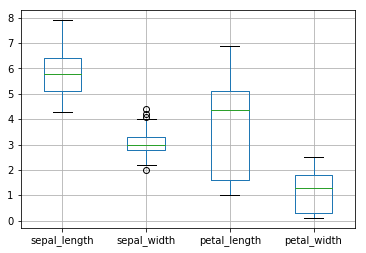

In [127]:
iris.boxplot()